# Lecture 10

**HW problem**

- 1.Implement Jacobi, GS without using "\" operator
- 2.Implement SOR, SSOR without using "\" operator
- 3.Randomly generate problems and 
    
        a. at each iteration record residual norm and abs.
        b. Compare rate of convergence against spectral radius.
        c. Put all this information into a narrative use graphics.

## Implement Jacobi and Gauss-Seidel

### Jacobi implementation 



In [21]:
using LinearAlgebra

# Implementation of Jacobi without using '\'
function jacobiIteration(A, b, x; iterMax = 100)
    """Implements the Jacobi iteration without using backslash.
    A is the coefficient matrix.
    b is the constant matrix.
    x is an initial guess."""
    n = length(x)
    for i = 1:iterMax
        xk = x
        for j = 1:n
            x[j] = 1/A[j,j]*(b[j] - vcat(A[j,1:j-1],A[j,j+1:end])' * vcat(xk[1:j-1],xk[j+1:end]) ) 
        end
    end
    return x
end

jacobiIteration (generic function with 1 method)

### Gauss-Seidel implementation 

In [22]:
# Implementation of Gauss-Seidel without using '\'
function gsIteration(A, b, x; iterMax = 100)
    """Implements the Gauss-Seidel iteration without using backslash.
    A is the coefficient matrix.
    b is the constant matrix.
    x is an initial guess."""
    n = length(x)
    for i = 1:iterMax
        xk = x
        for j = 1:n
            x[j] = 1/A[j,j]*(b[j] - A[j,1:j-1]'*x[1:j-1] - (A[j,j+1:end])'*xk[j+1:end])
        end
    end
    return x
end

gsIteration (generic function with 1 method)

## Implement SOR and SSOR

### SOR implementation

In [23]:
# Implement SOR without using '\'
function sorIteration(A, b, x, w; iterMax = 100)
    """Implements the SOR iteration without using backslash.
    A is the coefficient matrix.
    b is the constant matrix.
    x is an initial guess.
    w is a number between (0,1]"""
    n = length(x)
    for i = 1:iterMax
        xk = x
        for j = 1:n
            x[j] = w/A[j,j]*(b[j] - A[j,1:j-1]'*x[1:j-1] - (A[j,j+1:end])'*xk[j+1:end]) + (1-w)*xk[j]
        end
    end
    return x
end

sorIteration (generic function with 1 method)

### SSOR implementation

In [24]:
# Implement SSOR without using '\'
function ssorIteration(A, b, x, w; iterMax = 100)
    """Implements the SSOR iteration without using backslash.
    A is the coefficient matrix.
    b is the constant matrix.
    x is an initial guess.
    w is a number between (0,1]"""
    n = length(x)
    for i = 1:iterMax
        xk = x
        for j = 1:n
            x[j] = w/A[j,j]*(b[j] - A[j,1:j-1]'*x[1:j-1] - (A[j,j+1:end])'*xk[j+1:end]) + (1-w)*xk[j]
        end
        xk = x
        for j = 1:n
            x[j] = w/A[j,j]*(b[j] - A[j,1:j-1]'*xk[1:j-1] - (A[j,j+1:end])'*x[j+1:end]) + (1-w)*xk[j]
        end
    end
    return x
end

ssorIteration (generic function with 1 method)

#### Generate problem and test

In [25]:
function generateProblem(n)
    A = randn(n,n)  + sqrt(n)*Matrix{Float64}(I,n,n)
    x = randn(n)
    x0 = randn(n)
    b = A*x
    return A, b, x, x0
end

using Random
Random.seed!(1223);
A, b, x, x0 = generateProblem(10)

x00 = copy(x0)
z_j = jacobiIteration(A,b,x00)

x00 = copy(x0)
z_gs = gsIteration(A,b,x00)

w = 0.5
x00 = copy(x0)
z_sor = sorIteration(A,b,x00,w)

x00 = copy(x0)
z_ssor = ssorIteration(A,b,x00,w)

println(norm(z_j-x))
println(norm(z_gs-x))
println(norm(z_sor-x))
println(norm(z_ssor-x))

2.3347490579409934e-11
2.3347203926023393e-11
2.2151899190434225e-11
5.057306561942087e-16


#### Plot Norm of the residual of each iteration

In [32]:
# Implementation of Jacobi without using '\'
function jacobiIteration2(A, b, x, xreal; iterMax = 100)
    """Implements the Jacobi iteration without using backslash.
    A is the coefficient matrix.
    b is the constant matrix.
    x is an initial guess.
    xreal is the true value, i.e. A * xreal = b"""
    n = length(x)
    r = zeros(iterMax)
    for i = 1:iterMax
        r[i] = norm(x - xreal)
        xk = x
        for j = 1:n
            x[j] = 1/A[j,j]*(b[j] - vcat(A[j,1:j-1],A[j,j+1:end])' * vcat(xk[1:j-1],xk[j+1:end]) ) 
        end
    end
    return x, r
end

# Implementation of Gauss-Seidel without using '\'
function gsIteration2(A, b, x,xreal; iterMax = 100)
    """Implements the Gauss-Seidel iteration without using backslash.
    A is the coefficient matrix.
    b is the constant matrix.
    x is an initial guess."""
    n = length(x)
    r = zeros(iterMax)
    for i = 1:iterMax
        r[i] = norm(x - xreal)
        xk = x
        for j = 1:n
            x[j] = 1/A[j,j]*(b[j] - A[j,1:j-1]'*x[1:j-1] - (A[j,j+1:end])'*xk[j+1:end])
        end
    end
    return x,r
end

# Implement SOR without using '\'
function sorIteration2(A, b, x,xreal,w; iterMax = 100)
    """Implements the SOR iteration without using backslash.
    A is the coefficient matrix.
    b is the constant matrix.
    x is an initial guess.
    w is a number between (0,1]"""
    n = length(x)
    r = zeros(iterMax)
    for i = 1:iterMax
        r[i] = norm(x - xreal)
        xk = x
        for j = 1:n
            x[j] = w/A[j,j]*(b[j] - A[j,1:j-1]'*x[1:j-1] - (A[j,j+1:end])'*xk[j+1:end]) + (1-w)*xk[j]
        end
    end
    return x,r
end
        
# Implement SSOR without using '\'
function ssorIteration2(A, b, x,xreal, w; iterMax = 100)
    """Implements the SSOR iteration without using backslash.
    A is the coefficient matrix.
    b is the constant matrix.
    x is an initial guess.
    w is a number between (0,1]"""
    n = length(x)
    r = zeros(iterMax)
    for i = 1:iterMax
        r[i] = norm(x - xreal)
        xk = x
        for j = 1:n
            x[j] = w/A[j,j]*(b[j] - A[j,1:j-1]'*x[1:j-1] - (A[j,j+1:end])'*xk[j+1:end]) + (1-w)*xk[j]
        end
        xk = x
        for j = 1:n
            x[j] = w/A[j,j]*(b[j] - A[j,1:j-1]'*xk[1:j-1] - (A[j,j+1:end])'*x[j+1:end]) + (1-w)*xk[j]
        end
    end
    return x,r
end



using Random
Random.seed!(2020);
A, b, xtrue, x0 = generateProblem(10)

x00 = copy(x0)
z_j, r_j = jacobiIteration2(A,b,x00,xtrue)

x00 = copy(x0)
z_gs, r_gs = gsIteration2(A,b,x00,xtrue)

w = 0.5
x00 = copy(x0)
z_sor, r_sor = sorIteration2(A,b,x00,xtrue,w)

x00 = copy(x0)
z_ssor, r_ssor = ssorIteration2(A,b,x00,xtrue,w)


([0.981093, 0.526333, -0.179568, 0.723011, 0.647926, 1.87829, -0.449482, -1.16777, -1.37845, -3.01752], [5.38479, 2.08277, 0.800391, 0.309328, 0.11268, 0.0405078, 0.0163859, 0.00730392, 0.00419779, 0.00286837  …  5.6882e-16, 5.6882e-16, 5.6882e-16, 5.6882e-16, 5.6882e-16, 5.6882e-16, 5.6882e-16, 5.6882e-16, 5.6882e-16, 5.6882e-16])

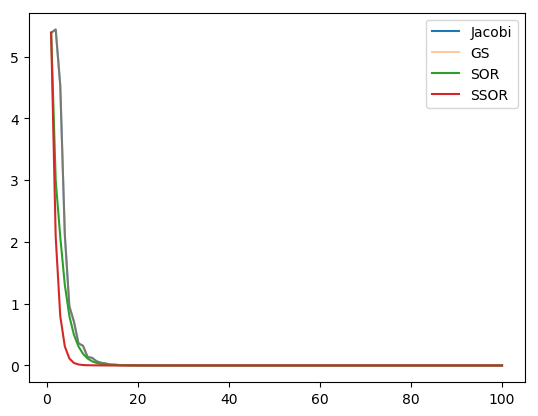

PyObject <matplotlib.legend.Legend object at 0x13b37c978>

In [33]:
using PyPlot

R = hcat(r_j,r_gs,r_sor,r_ssor)

fig, ax = subplots()
ax[:plot](1:100, R[:,1], label="Jacobi")
ax[:plot](1:100, R[:,2],alpha=0.4, label="GS")
ax[:plot](1:100, R[:,3], label="SOR")
ax[:plot](1:100, R[:,4], label="SSOR")
legend()

In [37]:
norm.(eigvals!(A))

10-element Array{Float64,1}:
 5.653325801516873 
 5.653325801516873 
 4.591597178843694 
 3.8894126741876556
 3.8894126741876556
 1.8410667023693745
 1.8410667023693745
 3.263152253059062 
 3.263152253059062 
 2.2099302973600166

**For the topic of spectral radius, check the homework 3 of cs 726**

## III. Randomized Kaezmarz Model

When problems become too large (too many data points,
too many model parameters), $SVD$ and related approaches
become impractical.
Very popular alternatives utilize "iterative" methods to
obtain approximate solutions.
In many cases for large problems, the $G$ matrix will be
sparse (many many zero elements), so strategies to take
advantage of this characteristic are important. 


**Set up:**

Let $x^c$ denote current iterate and $x^+$ denote next iterate. 

$r^c = Ax^c - b$ current residual; $r^+ = Ax^+ - b$ next residual.

$Ax = b$, $A = \begin{pmatrix}a_1 \\ \vdots \\ a_n \end{pmatrix}$, $b = \begin{pmatrix}b_1 \\ \vdots \\ b_n \end{pmatrix}$

<font color=brown>**Kazcmarz Method:**</font>

$$x^+ = x^c + \frac{b_i - a_ix^c}{||a_i||_2^2}a_i$$

<font color=brown>** Randomized Kazcmarz Method:**</font>

$$i_1,i_2,\cdots \in \{1, \cdots, n\}, \,\,\, P(i_1 = l) = \frac{||a_l||_2^2}{||A||_F^2}$$

<font color=brown>**Reference:**</font>

**Geometrical interpretation of Kazcmarz Method and Randomized Kazcmarz Method:**

https://www.math.ucla.edu/~deanna/Banfftalk.pdf

<font color=brown>**Theorem:**</font>

Suppose $A$ is invertible and $x^* = A^{-1}b$. Given iid $\{i_j, j \in N\}$, $P(i_1 = l) = \frac{||a_l||_2^2}{||A||_F^2}$. Given $x^0$, $\{x_k, k\in N\}$ s.t. $x_k = x_{k-1} + (\frac{b_{i_k} - a_{i_k}^Tx_{k-1}}{||a_{i_k}||_2^2})a_{i_k}$, then

$$E[||x_k - x^*||_2^2] \leq (1 - \frac{\sigma_{min}(A)^2}{||A||_F^2})^k \times ||x_0 - x^*||_2^2$$
$$P(||x_i - x^*||_2^2 > \epsilon) \leq \frac{1}{\epsilon^2}E[||x_i - x^*||_2^2]$$
$$\{i_{j+1}, j \in N\},\,\,\, x_k = x_{k-1} + \frac{b_{i_{k-1}} - a_{i_{k-1}}^Tx_{k-1}}{||a_{i_k}||_2^2}a_{i_k}$$

**Proof:** First, note that $i_k$ is independent of $i_{k+1}, i_{k-1}, \cdots, 0$ and is independent of $x_k, x_{k-1}, \cdots, x_1$

- **HW problem:Observation 1:**  $x_{k+1} - x_{k}$ is orthogonal to $x_{k+1} - x^*$ 

**proof of observation 1:**

Want to show $(x_{k+1} - x_{k})^T(x_{k+1} - x^*) = 0$

$$(x_{k+1} - x_{k})^T(x_{k+1} - x^*) = \frac{b_{i_{k+1}} - a_{i_{k+1}}^Tx_{k}}{||a_{i_{k+1}}||_2^2}a_{i_{k+1}}^T(x_{k+1} - x^*) = \frac{b_{i_{k+1}} - a_{i_{k+1}}^Tx_{k}}{||a_{i_{k+1}}||_2^2}(a_{i_{k+1}}^Tx_{k+1} - a_{i_{k+1}}^Tx^*) = \frac{b_{i_{k+1}} - a_{i_{k+1}}^Tx_{k}}{||a_{i_{k+1}}||_2^2}(b_{i_{k+1}} - b_{i_{k+1}}) = 0$$

By using the fact of observation 1. We get 
$$||x_{k+1} - x^*||_2^2 = ||x_{k} - x^*||_2^2 - ||x_{k+1} - x_k||_2^2$$
We know that: $b_{i_k} = a_{i_k}^Tx^*$. Thus,
$$x_{k+1} - x_k = \frac{a_{i_k}a_{i_k}^T}{||a_{i_k}||_2^2}(x_k - x^*)$$
$$||x_{k+1} - x_k||_2^2 = ||a_{i_k}||_2^2\frac{(a_{i_k}^T(x_k - x^*))^2}{||a_{i_k}||_2^4} = \frac{(a_{i_k}^T(x_k - x^*))^2}{||a_{i_k}||_2^2}$$

**observation 2:** for any vector $y \in R^n$ we have 
$$E[\frac{(a_{i_0}^Ty)^2}{||a_{i_0}||_2^2}] \geq \frac{\sigma_{min}(A)^2}{||A||_F^2}||y||_2^2$$

**Note:** 
$$\sum_{i = 1}^{n} (a_i^Ty)^2 = ||Ay||_2^2 \geq \sigma_{min}(A)^2||y||_2^2$$
$$\sum_{i = 1}^{n} \frac{1}{||A||_F^2}(a_i^Ty)^2 \geq \frac{\sigma_{min}(A)^2}{||A||_F^2}||y||_2^2$$
$$\implies \sum_{i = 1}^{n} \frac{||a_i||_2^2}{||A||_F^2}\frac{(a_i^Ty)^2}{||a_i||_2^2} \geq \frac{\sigma_{min}(A)^2}{||A||_F^2}||y||_2^2 $$
$$\implies E[\frac{(a_{i_0}^Ty)^2}{||a_{i_0}||_2^2}] \geq \frac{\sigma_{min}(A)^2}{||A||_F^2}||y||_2^2$$

Therefore, 

$$\begin{align} E[||x_{k+1} - x^*||_2^2 | x_k] &= ||x_{k} - x^*||_2^2 - E[\frac{(a_{i_k}^T(x_k - x^*))^2}{||a_{i_k}||_2^2} | x_k] \\
& \leq  (1-  \frac{\sigma_{min}(A)^2}{||A||_F^2}) ||x_k - x^*||_2^2\end{align}$$

Take Expectation on both side, we get:

$$E[||x_{k+1} - x^*||_2^2] \leq (1-  \frac{\sigma_{min}(A)^2}{||A||_F^2}) E[||x_k - x^*||_2^2]$$

Thus,
$$E[||x_k - x^*||_2^2] \leq (1 - \frac{\sigma_{min}(A)^2}{||A||_F^2})^k \times ||x_0 - x^*||_2^2$$


**HW problem:**

- 1.Implement Rankdom Kaezmarz for random permutations
- 2.Give a comparison of cyclic, randomized, rand permutation kaezmarz method

## IV. Gradient Descent

<font color=brown>**Kazcmarz Method:**</font>

$$x^+ = x^c + \frac{b_i - a_ix^c}{||a_i||_2^2}a_i$$

<font color=brown>**Gradient descent:**</font>

$$\begin{align} x^+ &= x^c + \alpha \sum_{i=1}^{n}a_i(b_i - a_i^Tx^c)\\
&= x^c + \alpha A^T(b-Ax^c)\end{align}$$

**HW problem:** Show $\sum_{i=1}^{n}a_i(b_i - a_i^Tx^c) = A^T(b-Ax^c)$

**My answer:** Here remember our set up: $a_i$ is a column vector but it is the row vector of matrix $A$

$A^T(b-Ax^c) = \begin{pmatrix} a_1, \cdots, a_n \end{pmatrix}(b - Ax^c) = \sum_{i=1}^{n}a_i(b_i - a_i^Tx^c)$

**HW problem:** If $A^Tr^c = 0$. Then we solve our problem

**My answer:** $x^+= x^c + \alpha A^T(b-Ax^c) = x^c + \alpha A^Tr^c = x^c$

<font color=brown>**Strategy 1: **</font>$r^+ = Ax^+ - b$, $min_\alpha ||r^+||_2^2$

<font color=brown>**Lemma:**</font> The $\alpha$ that minimizes the above problem is $$\alpha = \frac{||A^Tr^c||_2^2}{||AA^Tr^c||_2^2}$$

**proof:** 

$$\begin{align} g(\alpha) &= ||r^+||_2^2 = ||Ax^+ - b||_2^2 = ||Ax^c - b + \alpha AA^T(b-Ax^c)||_2^2 \\
&= ||-r^c + 2AA^Tr^c||_2^2 \\
&= (-r^c + 2AA^Tr^c)^T-r^c + 2AA^Tr^c \\
&= \alpha^2||AA^Tr^c||_2^2 - 2||A^Tr^c||_2^2\alpha + ||r^c||_2^2
\end{align}$$

Taking derivative and set it to zero. Also, after checking second derivative, we can conclude that the solution for this optimization problem is : $$\alpha = \frac{||A^Tr^c||_2^2}{||AA^Tr^c||_2^2}$$

<font color=brown>**Theorem:**</font> Suppose $A$ is invertible. Given $x_0 \in R^A$, let $\{x_k, k \in N\}$ s.t. $x_k = x_{k-1} + \alpha_{k-1}A^T(b - Ax_{k-1})$, where $\alpha_k = \frac{||A^Tr_k||_2^2}{||AA^Tr_k||_2^2}$. Then,
$$||r_k||_2^2 \leq (1 - \frac{4\sigma_1^2\sigma_n^2}{(\sigma_1^2 + \sigma_n^2)^2})^k ||r_0||_2^2$$

**proof:** 

$$\begin{align} ||r_{k+1}||_2^2 &= ||r_k||_2^2 - \alpha_k 2||A^Tr_k||_2^2 + \alpha_k||AA^Tr_k||_2^2 \\
&= ||r_k||_2^2 - \frac{2||A^Tr^k||_2^4}{||AA^Tr^k||_2^2} + \frac{||A^Tr^k||_2^4}{||AA^Tr^k||_2^2} \\
&= ||r_k||_2^2 - \frac{||A^Tr^k||_2^4}{||AA^Tr^k||_2^2} \\
&= (1 - \frac{||A^Tr^k||_2^4}{||r_k||_2^2||AA^Tr^k||_2^2})||r_k||_2^2
\end{align}$$

Using the SVD for matrix $A$, $A = U \Sigma V^T$, and let $w = \Sigma^TU^Tr^k$, we get 
$$(1 - \frac{||A^Tr^k||_2^4}{||r_k||_2^2||AA^Tr^k||_2^2}) = (1 - \frac{||\Sigma^TU^Tr^k||_2^4}{||r_k||_2^2||\Sigma\Sigma^TU^Tr^k||_2^2}) = (1 - \frac{||w||_2^4}{||\Sigma^{-1}w||_2^2||\Sigma2||_2^2})$$

**HW problem:** Upper bound on  $||\Sigma^{-1}u||_2^2$, $||\Sigma u||_2^2$ for any unit vector u.

**My answer:**
Rememerber the notes in Lecture 7 and the notes in CS 726 Non-linear optimization:
$$\sigma_{max}(A) = \max_{x \neq 0}\frac{||Ax||_2}{||x||_2} = ||A||_2$$
$$\sigma_{min}(A) = \min_{x \neq 0}\frac{||Ax||_2}{||x||_2} $$

We get:

$$||\Sigma^{-1}u||_2^2 \leq \frac{1}{\sigma_1}$$
$$||\Sigma u||_2^2 \leq {\sigma_n}$$

where, $0 \leq \sigma_1 \leq \cdots \leq \sigma_n$ are sigular value of A


Further, 

$$||\Sigma^{-1}u||_2^2 ||\Sigma u||_2^2 = (\sum_{i=1}^{n} \frac{u_i^2}{\sigma_i^2})(\sum_{i=1}^{n}\sigma_i^2u_i^2) \leq \frac{(\sigma_1^2 + \sigma_n^2)^2}{4\sigma_1^2\sigma_n^2}$$

**HW problem:** Kantorovich. Suppose $p_i \geq 0$ and sum to $1$. Let $0 \leq \sigma_n \leq \cdots \leq \sigma_1$, then, $$(\sum_{i=1}^{n}p_iu_i)(\sum_{i=1}^{n}p_i/u_i) \leq \frac{(u_1 + u_n)^2}{4 u_1 u_n}$$

**My answer:**

**reference:**

http://mathworld.wolfram.com/KantorovichInequality.html
http://services.aops.com/download.php?id=YXR0YWNobWVudHMvMS84LzM2YWVhMTg3Yzc0NDA5YTZmNDRhZDVjNmZlNmM4NzllMjRjNmE3LnBkZg==&rn=a2FudG9yb3ZpY2hfcHJvb2YucGRm

Define another function $f(d) = 1/d$ and let $\hat{d} = \sum_{i=1}^{n}p_iu_i$ and Note that $\hat{d} \in [u_n, u_1]$.
Then
$$\frac{1}{\sum_{i=1}^{n}p_iu_i} = f(\hat{d})$$ 

Define $h(d)$ be the linear function fitting the data $(u_1, 1/u_1)$ and $(u_n, 1/u_n)$, i.e.

$$h(d) = \frac{1}{u_n} + \frac{1/u_1 - 1/u_n}{u_1 - u_n}(d - u_n)$$

As f is a convec function, we know that $$f(d) \leq h(d)$, $\forall d \in [u_n, u_1]$$
So $$\sum_{i=1}^{n}\frac{p_i}{u_i} = \sum_{i=1}^{n}p_if(u_i) \leq \sum_{i=1}^{n}p_ih(u_i) = h(\sum_{i=1}^{n}p_iu_i) = h(\hat{d})$$

Thus,
$$\begin{align} \frac{1}{(\sum_{i=1}^{n}p_iu_i)(\sum_{i=1}^{n}p_i/u_i)} &\geq \frac{f(\hat{d})}{h(\hat{d})} \geq \min_{u_n\leq d \leq u_1} \frac{f(\hat{d})}{h(\hat{d})}\\ 
&= \min_{u_n\leq d \leq u_1}  \frac{\frac{1}{d}}{ \frac{1}{u_n} + \frac{(u_n - u)}{d_1d_n} } \\
&= u_1u_n \min_{u_n\leq d \leq u_1} \frac{1}{d(u_1 + u_n - d)} \\
&= u_1u_n \frac{1}{\frac{u_1+u_n}{2}(u_1 + u_n - \frac{u_1+u_n}{2})} \,\,\,(minimum\,\, d= \frac{u_1+u_n}{2}) \\
& = \frac{4u_1u_n}{u_1+u_n}^2
\end{align} $$

Thus,
$$ ||r_{k+1}||_2^2 \leq (1 - \frac{4\sigma_1^2\sigma_n^2}{\sigma_1^2+\sigma_n^2}) ||r_{k}||_2^2$$
Therefore,
$$ ||r_{k}||_2^2 \leq (1 - \frac{4\sigma_1^2\sigma_n^2}{\sigma_1^2+\sigma_n^2})^k ||r_{0}||_2^2$$

<font color=brown>**Strategy 2: **</font> $A$ invertible, $\min_\alpha ||x_{k+1} - x^*||_2^2$

**HW problem:**
- 1.What is $\alpha$? Is it practical?
- 2.Do we converge
- 3.Rate convergence

<font color=brown>**Strategy 3: **</font> $||r^+||_2 = ||(I - \alpha AA^T)r^c||_2 \leq ||(I - \alpha AA^T)||_2||r^c||_2$, $\min_\alpha ||I - \alpha AA^T||_2$

**HW problem:**
- 1.What is $\alpha$? 

<font color=brown>**Strategy 4: **</font> $||x_{k+1} - x^*||_2 \leq ||I - \alpha AA^T||_2 ||x_k - x^*||_2$

**HW problem:**
- 1.Why is this inequality true?
- 2.What is $\alpha$ that minimizes this?